In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_values(values):
    """
    Plots the values of each state as a bar graph.

    Args:
    - values: A 1D array of state values.
    """
    states = np.arange(len(values))
    plt.figure(figsize=(10, 6))
    plt.bar(states, values, color='blue')
    plt.xlabel('States')
    plt.ylabel('Values')
    plt.title('State Values')
    plt.show()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


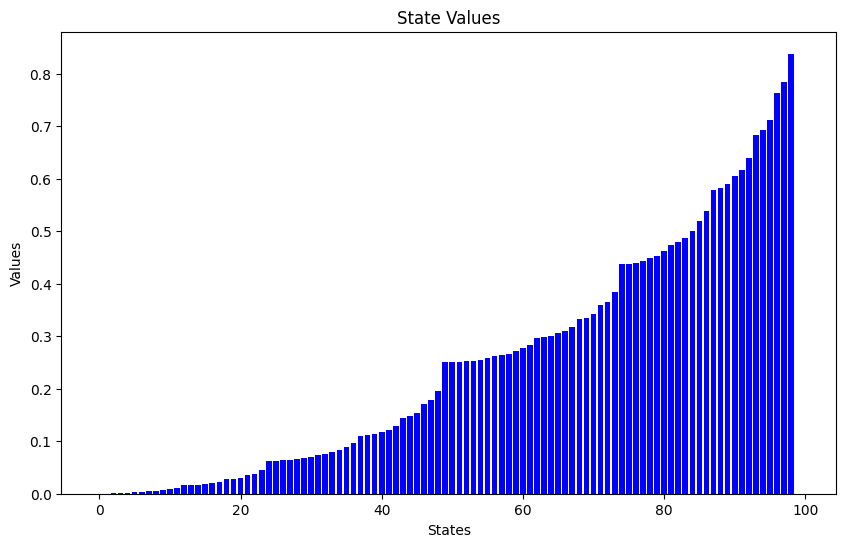

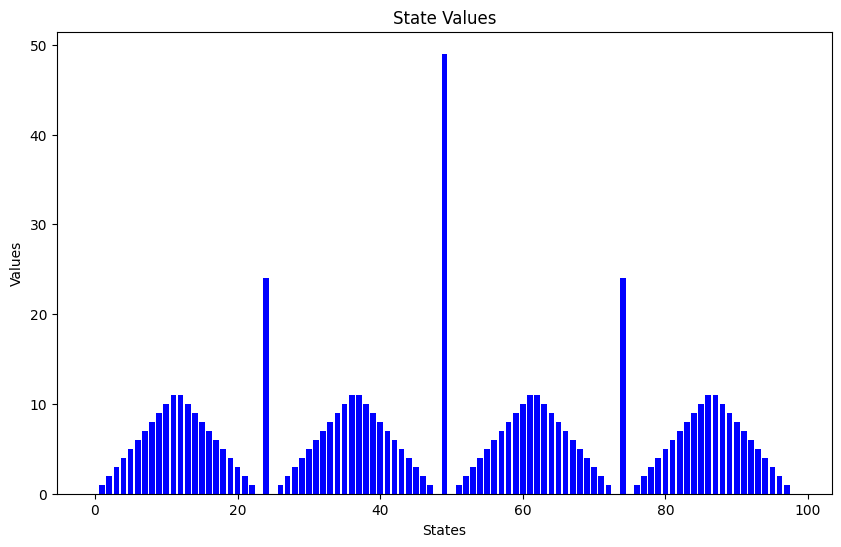

In [25]:
#gamblers problem reinforcement learning

states = np.arange(1, 100)
print(states)
rewards = np.zeros(101)
rewards[100] = 1
values = np.zeros(101)
discount = 1

prob_heads = 0.25
theta = 1e-4
while True:

    delta = 0
    policy = np.zeros(100)
    for s in states:
        actions = np.arange(1, min(s, 100 - s)+1)
        action_values = []
        for action in actions:
            action_value = prob_heads*(rewards[s+action] + discount* values[s+action]) + (1-prob_heads)* ( rewards[s-action] + discount*values[s-action])
            action_values.append(action_value)
        
        best_action = np.argmax(action_values)
        delta = max(delta , abs(values[s] - action_values[best_action]) )
        values[s] = action_values[best_action]
        policy[s] = best_action
    
    if delta < theta:
        break

plot_values(values[1:])
plot_values(policy[1:])

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Gamblers problem reinforcement learning
states = np.arange(1, 100)
rewards = np.zeros(101)
rewards[100] = 1
values = np.zeros(101)
discount = 1
prob_heads = 0.25
theta = 1e-4

# Initialize policy randomly
policy = np.zeros(100)

def policy_evaluation(policy, values, theta, discount, prob_heads, rewards):
    while True:
        delta = 0
        for s in states:
            v = values[s]
            action = policy[s]
            values[s] = prob_heads * (rewards[s + action] + discount * values[s + action]) + (1 - prob_heads) * (rewards[s - action] + discount * values[s - action])
            delta = max(delta, abs(v - values[s]))
        if delta < theta:
            break
    return values

def policy_improvement(policy, values, discount, prob_heads, rewards):
    policy_stable = True
    for s in states:
        old_action = policy[s]
        actions = np.arange(1, min(s, 100 - s) + 1)
        action_values = []
        for action in actions:
            action_value = prob_heads * (rewards[s + action] + discount * values[s + action]) + (1 - prob_heads) * (rewards[s - action] + discount * values[s - action])
            action_values.append(action_value)
        best_action = actions[np.argmax(action_values)]
        policy[s] = best_action
        if old_action != best_action:
            policy_stable = False
    return policy, policy_stable

# Policy Iteration
while True:
    values = policy_evaluation(policy, values, theta, discount, prob_heads, rewards)
    policy, policy_stable = policy_improvement(policy, values, discount, prob_heads, rewards)
    if policy_stable:
        break

def plot_values(values):
    """
    Plots the values of each state as a bar graph.
    """
    states = np.arange(1, len(values))
    plt.figure(figsize=(10, 6))
    plt.bar(states, values[1:], color='blue')
    plt.xlabel('States')
    plt.ylabel('Values')
    plt.title('State Values')
    plt.show()

def plot_policy(policy):
    """
    Plots the policy of each state.
    """
    states = np.arange(1, len(policy) + 1)
    plt.figure(figsize=(10, 6))
    plt.bar(states, policy, color='green')
    plt.xlabel('States')
    plt.ylabel('Policy (Best Action)')
    plt.title('Policy for Each State')
    plt.show()

# Plot the values and policy
plot_values(values)
plot_policy(policy)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices